<a href="https://colab.research.google.com/github/RAGISHIVANAND/DEEP_LEARNING/blob/main/keras_cnn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential

from tensorflow.keras.optimizers import Adam
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D

In [9]:
data = datasets.load_digits()
x_data = data.images
y_data=data.target
print(x_data.shape[0])
print(x_data.shape[1])
print(x_data.shape[2])

#reshape x_data into 3-D format note that this follows image format
#of tensorflow backend

x_data=x_data.reshape(x_data.shape[0],x_data.shape[1],x_data.shape[2],1)

#one-hot encoding of y_data
y_data=to_categorical(y_data)

#partition data into train/test sets
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=777)

1797
8
8


# ***MODEL OPTIMIZER***

In [17]:
model=Sequential()

#convolution layer
#model.add(Conv2D(input_shape=(x_data.shape[1],x_data.shape[2],x_data.shape[3]),filters=10,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Conv2D(input_shape=(x_data.shape[1], x_data.shape[2], x_data.shape[3]), filters=10, kernel_size=(3, 3), strides=(1, 1), padding='valid'))


#activation layer before pooling
model.add(Activation('relu'))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#prior layer should be flattend to be connected to dense layers
model.add(Flatten())

#dense layer with 50 neurons
model.add(Dense(50,activation='relu'))

#final layer with 10 neurons to classify the instances
model.add(Dense(10,activation='softmax'))

# ***MODEL COMPILATION***

In [19]:
adam = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

history=model.fit(x_train,y_train,batch_size=50,validation_split=0.2,epochs=100,verbose=0)

In [20]:
results = model.evaluate(x_test,y_test)
print('Test accuracy:',results[1])

17/17 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9796
Test accuracy: 0.979629635810852


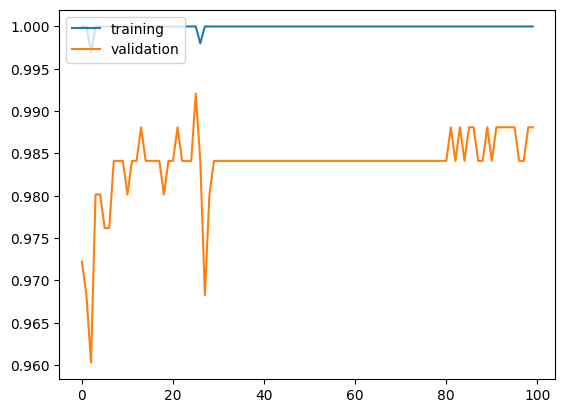

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'],loc='upper left')
plt.show()